# Applications of Eigenvalues and Eigenvectors


Eigenvalues and eigenvectors are fundamental concepts in linear algebra with many real-world applications.  
They describe how a linear transformation affects space, and they appear in data science, physics, engineering, and computer science.  


## Geometric Meaning


- An **eigenvector** of a matrix is a vector whose direction remains unchanged after transformation.  
- The corresponding **eigenvalue** tells how much the eigenvector is stretched or compressed.  

Example: A transformation of a circle into an ellipse.  


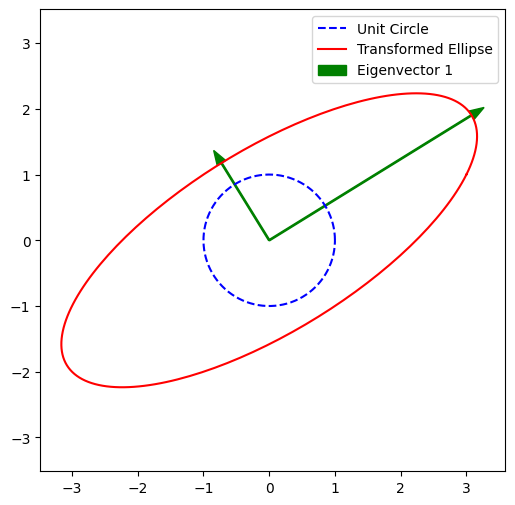

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Transformation matrix
A = np.array([[3, 1],
              [1, 2]])

# Unit circle
theta = np.linspace(0, 2*np.pi, 200)
circle = np.array([np.cos(theta), np.sin(theta)])

# Transformed ellipse
ellipse = A @ circle

# Eigen decomposition
eigvals, eigvecs = np.linalg.eig(A)

# Plot
plt.figure(figsize=(6,6))
plt.plot(circle[0], circle[1], 'b--', label="Unit Circle")
plt.plot(ellipse[0], ellipse[1], 'r', label="Transformed Ellipse")

# Eigenvectors
for i in range(len(eigvals)):
    vec = eigvecs[:, i] * eigvals[i]
    plt.arrow(0, 0, vec[0], vec[1], 
              color='g', width=0.02, head_width=0.15, label=f"Eigenvector {i+1}" if i==0 else "")

plt.axis('equal')
plt.legend()
# plt.title("Circle transformed to ellipse
# Eigenvectors = directions, Eigenvalues = stretch factors")
plt.show()


## Application 1: Principal Component Analysis (PCA)


PCA uses eigenvectors of the covariance matrix to find directions of maximum variance in data.  
The eigenvalues indicate the amount of variance captured along each direction.  


Explained variance (eigenvalues): [4.22824171 0.24267075]
Principal components (eigenvectors):
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


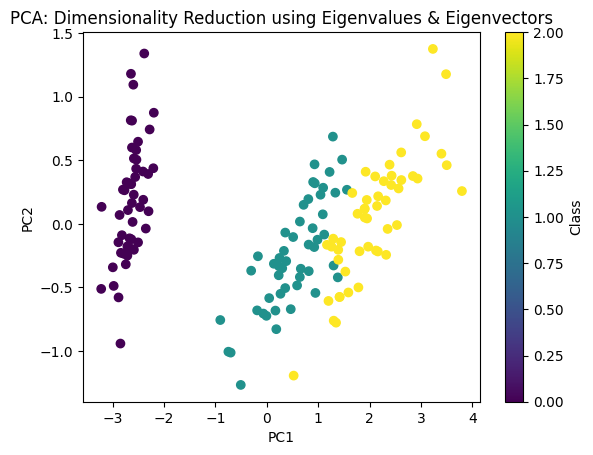

In [11]:

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load sample data (Iris dataset)
X, y = load_iris(return_X_y=True)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance (eigenvalues):", pca.explained_variance_)
print("Principal components (eigenvectors):\n", pca.components_)

# Plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Dimensionality Reduction using Eigenvalues & Eigenvectors")
plt.colorbar(label="Class")
plt.show()


## Application 2: Google PageRank (Simplified)


Google's PageRank algorithm is based on the **eigenvector corresponding to the largest eigenvalue** of a web-link matrix.  
This eigenvector gives the "importance score" of each page.  


In [12]:

# Example web graph adjacency matrix
M = np.array([[0, 0, 1],
              [0.5, 0, 0],
              [0.5, 1, 0]])

eigvals, eigvecs = np.linalg.eig(M)

# Find principal eigenvector (corresponding to eigenvalue ~1)
principal_eigvec = eigvecs[:, np.argmax(np.abs(eigvals))].real
pagerank = principal_eigvec / principal_eigvec.sum()

print("Eigenvalues:", eigvals)
print("PageRank scores:", pagerank)


Eigenvalues: [ 1. +0.j  -0.5+0.5j -0.5-0.5j]
PageRank scores: [0.4 0.2 0.4]


## Application 3: Stability in Differential Equations


In systems of differential equations, eigenvalues determine the stability of equilibrium points.  
- If all eigenvalues have negative real parts → system is stable.  
- If any eigenvalue has a positive real part → system is unstable.  


In [13]:

A = np.array([[0, 1],
              [-2, -3]])

eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:", eigvals)
print("Since both eigenvalues have negative real parts, the system is stable.")


Eigenvalues: [-1. -2.]
Since both eigenvalues have negative real parts, the system is stable.
